In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 解决中文乱码

df = pd.read_csv('data/test_predictions.csv')

y_label = df['label']
y_probs = df['probability']
y_pred = df['prediction']

scores = {
    'Accuracy': 0.9567,
    'Precision': 0.9611,
    'Recall': 0.9944,
    'MCC': 0.4486,
    'F1-Score': 0.9775,
    'AUC': 0.8217
}
labels = list(scores.keys())
values = list(scores.values())

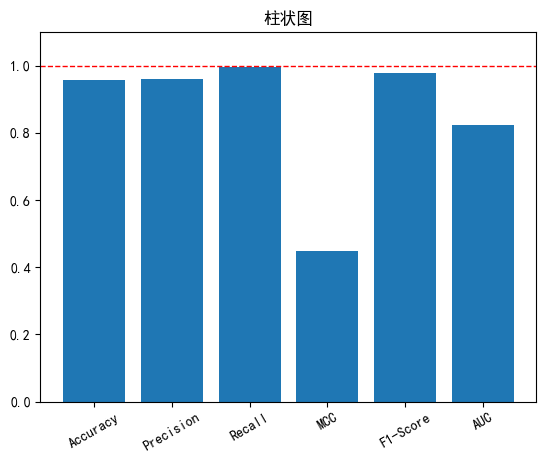

In [44]:
plt.figure()
plt.bar(labels, values)
plt.ylim(0, 1.1)
plt.axhline(y=1, linestyle='--', linewidth=1, color='r')
plt.title('柱状图')
plt.xticks(rotation=30)

plt.savefig(
    "image/bar.png",
    dpi=300,
    bbox_inches='tight'
)
plt.show()

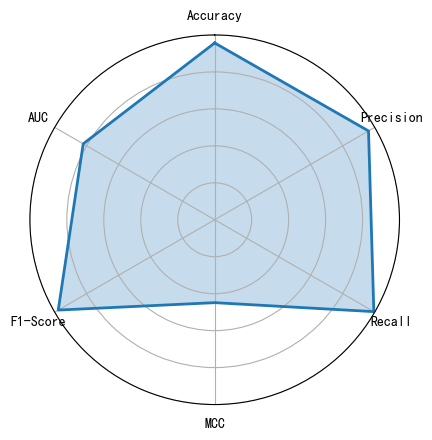

In [45]:
labels_closed = labels + [labels[0]]
values_closed = values + [values[0]]

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

plt.figure()
ax = plt.axes(polar=True)

ax.set_theta_offset(np.pi / 2)  # 正上方开始
ax.set_theta_direction(-1)

ax.plot(angles, values_closed, linewidth=2)
ax.fill(angles, values_closed, alpha=0.25)

ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_ylim(0, 1)
ax.set_yticklabels([])

plt.savefig(
    "image/radar.png",
    dpi=300,
    bbox_inches='tight'
)
plt.show()

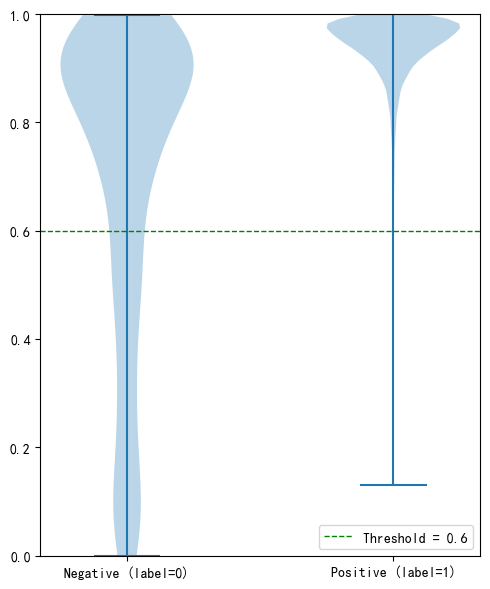

In [59]:
probs_neg = y_probs[y_label == 0]  # 负样本
probs_pos = y_probs[y_label == 1]  # 正样本

plt.figure(figsize=(5, 6))
plt.violinplot([probs_neg, probs_pos], )

# 阈值线
plt.axhline(
    y=0.6,
    linestyle='--',
    linewidth=1,
    color='green',
    label='Threshold = 0.6'
)

plt.xticks([1, 2], ['Negative (label=0)', 'Positive (label=1)'])
plt.ylim(0, 1)

plt.legend()
plt.tight_layout()

plt.savefig(
    "image/violin.png",
    dpi=300,
    bbox_inches='tight'
)
plt.show()

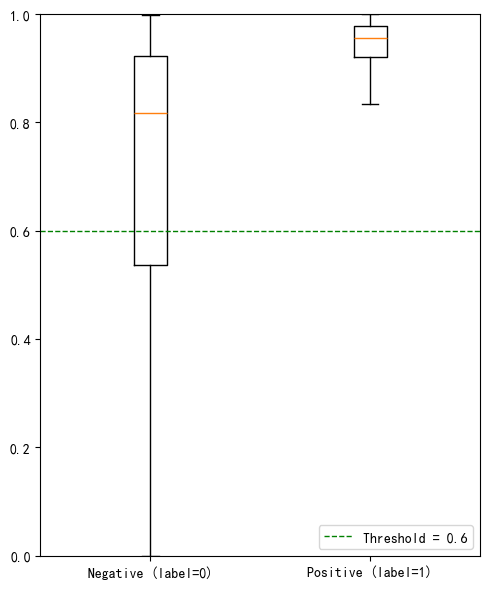

In [60]:
plt.figure(figsize=(5, 6))

plt.boxplot(
    [probs_neg, probs_pos],  # 输入两组概率数据
    tick_labels=[  # 设置 x 轴类别名称
        'Negative (label=0)',
        'Positive (label=1)'
    ],
    showfliers=False
)

plt.axhline(
    y=0.6,
    linestyle='--',
    linewidth=1,
    color='green',
    label='Threshold = 0.6'
)

plt.ylim(0, 1)
plt.legend()
plt.tight_layout()

plt.savefig(
    "image/box.png",
    dpi=300,
    bbox_inches='tight'
)
plt.show()


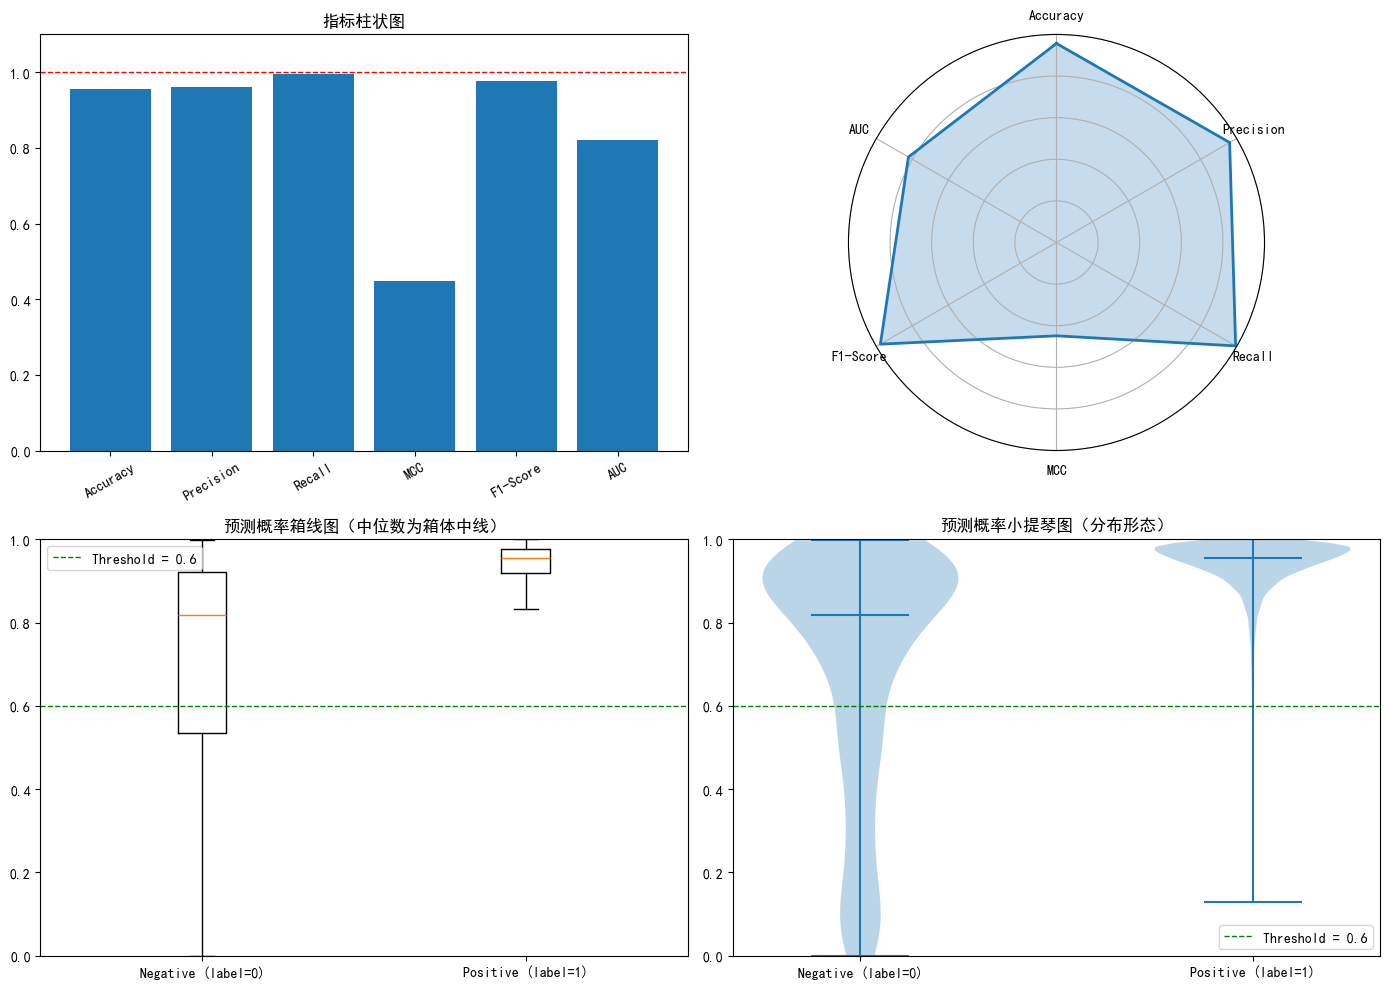

In [61]:
fig = plt.figure(figsize=(14, 10))

# ========================
# 3. 左上：柱状图
# ========================
ax1 = fig.add_subplot(2, 2, 1)

ax1.bar(labels, values)
ax1.axhline(y=1, linestyle='--', linewidth=1, color='r')
ax1.set_ylim(0, 1.1)
ax1.set_title('指标柱状图')
ax1.tick_params(axis='x', rotation=30)

# ========================
# 4. 右上：雷达图
# ========================
labels_closed = labels + [labels[0]]
values_closed = values + [values[0]]

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

ax2 = fig.add_subplot(2, 2, 2, polar=True)

ax2.set_theta_offset(np.pi / 2)
ax2.set_theta_direction(-1)

ax2.plot(angles, values_closed, linewidth=2)
ax2.fill(angles, values_closed, alpha=0.25)

ax2.set_thetagrids(np.degrees(angles[:-1]), labels)
ax2.set_ylim(0, 1)
ax2.set_yticklabels([])

# ========================
# 5. 左下：箱线图
# ========================
probs_neg = y_probs[y_label == 0]
probs_pos = y_probs[y_label == 1]

ax3 = fig.add_subplot(2, 2, 3)

ax3.boxplot(
    [probs_neg, probs_pos],
    tick_labels=['Negative (label=0)', 'Positive (label=1)'],
    showfliers=False
)

ax3.axhline(
    y=0.6,
    linestyle='--',
    linewidth=1,
    color='green',
    label='Threshold = 0.6'
)

ax3.set_ylim(0, 1)
ax3.set_title('预测概率箱线图（中位数为箱体中线）')
ax3.legend()

# ========================
# 6. 右下：小提琴图
# ========================
ax4 = fig.add_subplot(2, 2, 4)

ax4.violinplot([probs_neg, probs_pos], showmeans=False, showmedians=True)

ax4.axhline(
    y=0.6,
    linestyle='--',
    linewidth=1,
    color='green',
    label='Threshold = 0.6'
)

ax4.set_xticks([1, 2])
ax4.set_xticklabels(['Negative (label=0)', 'Positive (label=1)'])
ax4.set_ylim(0, 1)
ax4.set_title('预测概率小提琴图（分布形态）')
ax4.legend()

# ========================
# 7. 布局 & 保存
# ========================
plt.tight_layout()

plt.savefig(
    "image/summary_visualization.png",
    dpi=300,
    bbox_inches='tight'
)

plt.show()
